<a href="https://colab.research.google.com/github/rjc89/Tutorials/blob/master/pandas_time_series_tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# following along with https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html

In [ ]:
!curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4156k    0 4156k    0     0   755k      0 --:--:--  0:00:05 --:--:--  839k


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/FremontBridge.csv', index_col='Date', parse_dates=True)
df

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-03-25 09:00:00,23.0,10.0,13.0
2020-03-25 10:00:00,49.0,17.0,32.0
2020-03-25 11:00:00,26.0,12.0,14.0


In [ ]:
df.columns = ['Total', 'East', 'West']
df

,Total,East,West
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0
...,...,...,...
2020-03-25 09:00:00,23.0,10.0,13.0
2020-03-25 10:00:00,49.0,17.0,32.0
2020-03-25 11:00:00,26.0,12.0,14.0


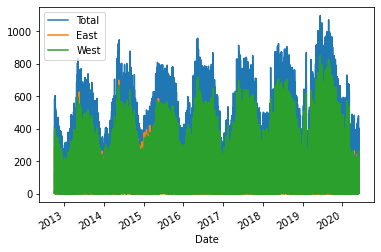

In [20]:
df.plot();

### Weekly data

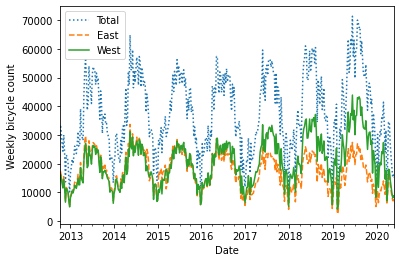

In [19]:
weekly = df.resample('W').sum()   # summing over each week
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

### 30 day rolling mean

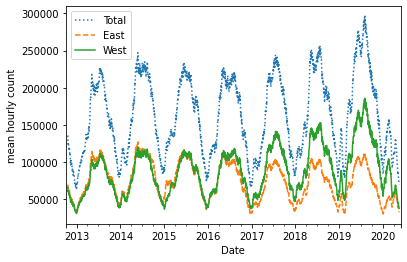

In [22]:
daily = df.resample('D').sum()   # summing over each day
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])   # 30 day window rolling sum
plt.ylabel('mean hourly count');

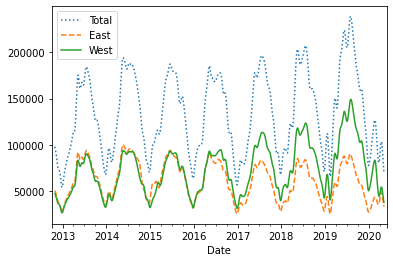

In [24]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

              # gaussian kernel applied to each 50 day window
              # definitely a weather based seasonality in the data

### Looking at average hourly data over an average day

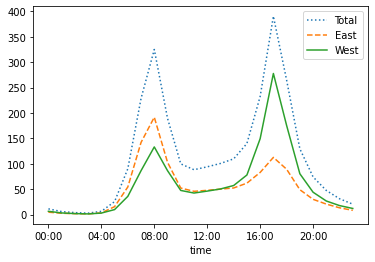

In [26]:
by_time = df.groupby(df.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

# two peaks for the morning and evening commute

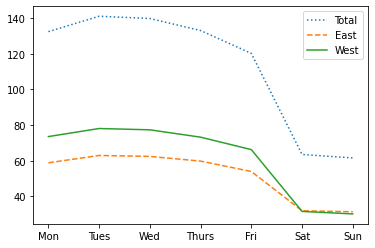

In [28]:
by_weekday = df.groupby(df.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

# how many bikes are around on each day of the week

### Groupby weekdays and weekends

In [ ]:
weekend = np.where(df.index.weekday < 5, 'Weekday', 'Weekend')
by_time = df.groupby([weekend, df.index.time]).mean()

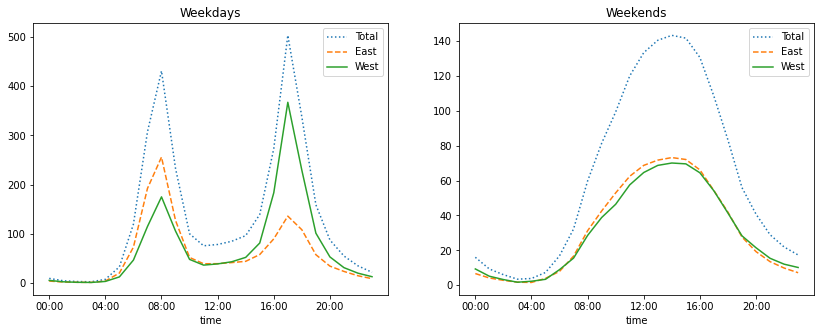

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);